## ANSL-analysis and plotting

created by Michael Ernst (https://github.com/M-earnest)

In [1]:
# import necessary dependencies
%matplotlib inline
import errno  # handy system and path functions
from __future__ import division #so 1/2 = 0.5, not 1/2=0
import glob
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np
import os
import pandas as pd
import random
import scipy
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler


### ANSL data: cleaning/extraction: 
* at which point of volume and frequency stimuli was discovered
* presented in ascending or descending Volume condition
* order of stimuli presentation

#### first we need to extract the necessary information for plotting our results

In [2]:
#  get all tsv files in subject directory
directory = '/home/michael/Desktop/sub-xx/*'
os.chdir('/home/michael/Desktop/sub-xx/')

# create png directory to store plots in
try:
    os.makedirs('pngs/')
except OSError as e:
    if e.errno != errno.EEXIST:
        raise

#  define directory to save plots in
outdir = '/home/michael/Desktop/sub-xx/pngs/'
#  get subject name
subject = 'sub-xx'


# create a counter to keep track of which loop-iteration we're in
counter = 0

#  iterate over all files in subject directory, exclude the ones we're not
#  interested in
for idx, filename in enumerate(glob.glob(directory)):
    if 'trial_start' in filename:
        #print('skipped')
        continue
    elif 'stimuli_onset' in filename:
        #print('skipped')
        continue
    elif 'json' in filename:
        #print('skipped')
        continue
    elif 'html' in filename:
        #print('skipped')
        continue
    elif 'png' in filename:
        #print('skipped')
        continue
    elif 'stats' in filename:
        #print('skipped')
        continue
    else:
        #  if we're at the first iteration of loop read Data into DataFrame
        if counter == 0:
            df = pd.read_csv(filename, sep='\t',
                             encoding="utf8", engine='python')
        #  if we're in a sucessive loop read Data and append to DataFrame
        elif counter > 0:
            df2 = pd.read_csv(filename, sep='\t',
                              encoding="utf8", engine='python')
            df = df.append(df2, ignore_index=True)
        counter += 1 # update counter

###  get an better overview of your data

In [3]:

#subject = 'sub-test'
display(df['Level (dBFS)'].mean())

df_dBFS = df.groupby(['subject','acquisition_scheme','order_volume',
                      'order_presentation','Frequency (Hz)']).aggregate('mean')



df_dBFS = df_dBFS.unstack()
df_dBFS = df_dBFS['Level (dBFS)']
df.to_csv('/home/michael/ANSL/data/ansl_dataset.csv', index=False)


display(df_dBFS.columns)
df_dBFS

-74.375

Int64Index([150, 250, 500, 1000, 1500, 2000, 2250, 2500, 2750, 3000, 4000,
            6000, 8000],
           dtype='int64', name='Frequency (Hz)')

Frequency (Hz)                                              150   250   500   \
subject acquisition_scheme order_volume order_presentation                     
sub-01  baseline           decreasing   ascending            -90   -20   -90   
                                        descending           -90   -90   -20   
                           increasing   ascending            -90   -90   -90   
                                        descending           -90   -90   -90   
        epi_fast(TR1s)     decreasing   ascending            -40   -50   -70   
                                        descending           -40   -60   -60   
                           increasing   ascending            -40   -70   -80   
                                        descending           -20   -50   -70   
        epi_standard(TR2s) decreasing   ascending            -50   -60   -90   
                                        descending           -40   -50   -90   
                           increasing   ascending            -40   -50   -90   
                                        descending           -40   -50   -70   
        mprage(T1w)        decreasing   ascending            -60   -70   -80   
                                        descending           -60   -70   -90   
                           increasing   ascending            -40   -50   -50   
                                        descending           -50   -40   -60   

Frequency (Hz)                                              1000  1500  2000  \
subject acquisition_scheme order_volume order_presentation                     
sub-01  baseline           decreasing   ascending            -90   -90   -90   
                                        descending           -90   -90   -90   
                           increasing   ascending            -90   -90   -90   
                                        descending           -90   -90   -90   
        epi_fast(TR1s)     decreasing   ascending            -60   -60   -90   
                                        descending           -60   -90   -60   
                           increasing   ascending            -40   -60   -90   
                                        descending           -60   -60   -60   
        epi_standard(TR2s) decreasing   ascending            -70   -80   -70   
                                        descending           -60   -80   -70   
                           increasing   ascending            -90   -90   -80   
                                        descending           -50   -70   -80   
        mprage(T1w)        decreasing   ascending            -90   -90   -90   
                                        descending           -20   -90   -90   
                           increasing   ascending            -80   -70   -80   
                                        descending           -80   -80   -80   

Frequency (Hz)                                              2250  2500  2750  \
subject acquisition_scheme order_volume order_presentation                     
sub-01  baseline           decreasing   ascending            -90   -90   -80   
                                        descending           -90   -80   -80   
                           increasing   ascending            -80   -80   -90   
                                        descending           -80   -80   -90   
        epi_fast(TR1s)     decreasing   ascending            -60   -60   -70   
                                        descending           -60   -60   -70   
                           increasing   ascending            -70   -60   -70   
                                        descending           -60   -60   -70   
        epi_standard(TR2s) decreasing   ascending            -70   -60   -80   
                                        descending           -70   -70   -80   
                           increasing   ascending            -70   -80   -80   
                                        descending           -70   -70   -80  

#### _if you want to split your dataframe by some condition use the [groupby function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)_

In [4]:
# how to use groupby
grouped = df.groupby('order_volume')

for name, group in grouped:
    print(name)
    display(group)
    if name == 'increase':
        df_increase = pd.DataFrame(group)
    else:
        df_decrease = pd.DataFrame(group)


decreasing


,subject,acquisition_scheme,order_volume,order_presentation,item,Level (dBFS),Frequency (Hz)
0,sub-01,epi_fast(TR1s),decreasing,ascending,1000hz_minus_60dBFS.wav,-60,1000
1,sub-01,epi_fast(TR1s),decreasing,ascending,1500hz_minus_60dBFS.wav,-60,1500
2,sub-01,epi_fast(TR1s),decreasing,ascending,2000hz_minus_90dBFS.wav,-90,2000
3,sub-01,epi_fast(TR1s),decreasing,ascending,2250hz_minus_60dBFS.wav,-60,2250
4,sub-01,epi_fast(TR1s),decreasing,ascending,2500hz_minus_60dBFS.wav,-60,2500
5,sub-01,epi_fast(TR1s),decreasing,ascending,2750hz_minus_70dBFS.wav,-70,2750
6,sub-01,epi_fast(TR1s),decreasing,ascending,3000hz_minus_70dBFS.wav,-70,3000
7,sub-01,epi_fast(TR1s),decreasing,ascending,4000hz_minus_70dBFS.wav,-70,4000
8,sub-01,epi_fast(TR1s),decreasing,ascending,6000hz_minus_80dBFS.wav,-80,6000
9,sub-01,epi_fast(TR1s),decreasing,ascending,8000hz_minus_60dBFS.wav,-60,8000


increasing


,subject,acquisition_scheme,order_volume,order_presentation,item,Level (dBFS),Frequency (Hz)
26,sub-01,epi_fast(TR1s),increasing,ascending,1000hz_minus_40dBFS.wav,-40,1000
27,sub-01,epi_fast(TR1s),increasing,ascending,1500hz_minus_60dBFS.wav,-60,1500
28,sub-01,epi_fast(TR1s),increasing,ascending,2000hz_minus_90dBFS.wav,-90,2000
29,sub-01,epi_fast(TR1s),increasing,ascending,2250hz_minus_70dBFS.wav,-70,2250
30,sub-01,epi_fast(TR1s),increasing,ascending,2500hz_minus_60dBFS.wav,-60,2500
31,sub-01,epi_fast(TR1s),increasing,ascending,2750hz_minus_70dBFS.wav,-70,2750
32,sub-01,epi_fast(TR1s),increasing,ascending,3000hz_minus_80dBFS.wav,-80,3000
33,sub-01,epi_fast(TR1s),increasing,ascending,4000hz_minus_70dBFS.wav,-70,4000
34,sub-01,epi_fast(TR1s),increasing,ascending,6000hz_minus_80dBFS.wav,-80,6000
35,sub-01,epi_fast(TR1s),increasing,ascending,8000hz_minus_80dBFS.wav,-80,8000


#### get basic values (means, sd, etc.) 

In [5]:

def get_stats(dataframe):
    """ 
    function to calculate statistics of data and write them to df
    
    takes dataframe created by 'extract_data' function as input
    """
    # groupby frequency and calculate mean volume etc.
    stats = dataframe.groupby('Frequency (Hz)')['Level (dBFS)'].describe().unstack()

    stats = pd.Series.to_frame(stats)
    stats = stats.unstack()
    stats = stats[0]

    freqs = []
    counts = []
    means = []
    sds = []
    mins_ = []
    maxs_ = []
    medians = []
    per25s = []
    per75s = []
    
    # write values for each frequency into lists
    for item in stats:
        freq = item
        count = stats[item].iloc[0]
        mean = stats[item].iloc[1]
        sd = stats[item].iloc[2]
        min_ = stats[item].iloc[3]
        max_ = stats[item].iloc[4]
        per25 = stats[item].iloc[5]
        median = stats[item].iloc[6]
        per75 = stats[item].iloc[7]   
        freqs.append(item)
        means.append(mean)
        counts.append(count)
        sds.append(sd)
        mins_.append(min_)
        maxs_.append(max_)
        medians.append(median)
        per25s.append(per25)
        per75s.append(per75)


    df_mean= pd.DataFrame({'Frequency (Hz)': freqs, 'mean_dBFS': means,
                           'standard_deviation': sds, 'min': mins_,
                           'max': maxs_, 'median': medians, 
                           '25%': per25s, '75%': per75s})
    

    
    return df_mean


df_mean = get_stats(df)
display(df_mean)
# save csv
df_mean.to_csv(outdir+subject+'_ansl_stats.csv', index=False)

,Frequency (Hz),mean_dBFS,standard_deviation,min,max,median,25%,75%
0,150,-55.000,22.803509,-90.0,-67.5,-40.0,-45.0,-20.0
1,250,-60.000,19.321836,-90.0,-70.0,-50.0,-55.0,-20.0
2,500,-74.375,19.653244,-90.0,-90.0,-67.5,-80.0,-20.0
3,1000,-70.000,21.291626,-90.0,-90.0,-60.0,-75.0,-20.0
4,1500,-80.000,12.110601,-90.0,-90.0,-70.0,-85.0,-60.0
5,2000,-81.250,10.878113,-90.0,-90.0,-77.5,-85.0,-60.0
6,2250,-74.375,10.307764,-90.0,-80.0,-70.0,-70.0,-60.0
7,2500,-73.125,10.781929,-90.0,-80.0,-60.0,-75.0,-60.0
8,2750,-78.750,6.191392,-90.0,-80.0,-77.5,-80.0,-70.0
9,3000,-84.375,7.274384,-90.0,-90.0,-80.0,-90.0,-70.0


### Plotting the mean dBFS at which each frequency was discovered

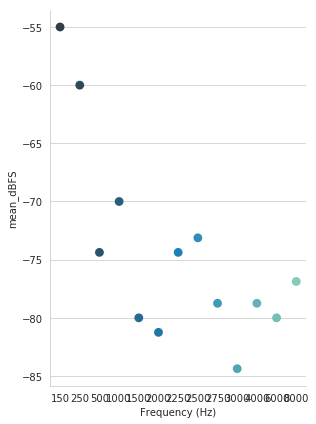

In [6]:
sns.set_style('whitegrid')
sns.catplot(data=df_mean,y = 'mean_dBFS', x = 'Frequency (Hz)',
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point")


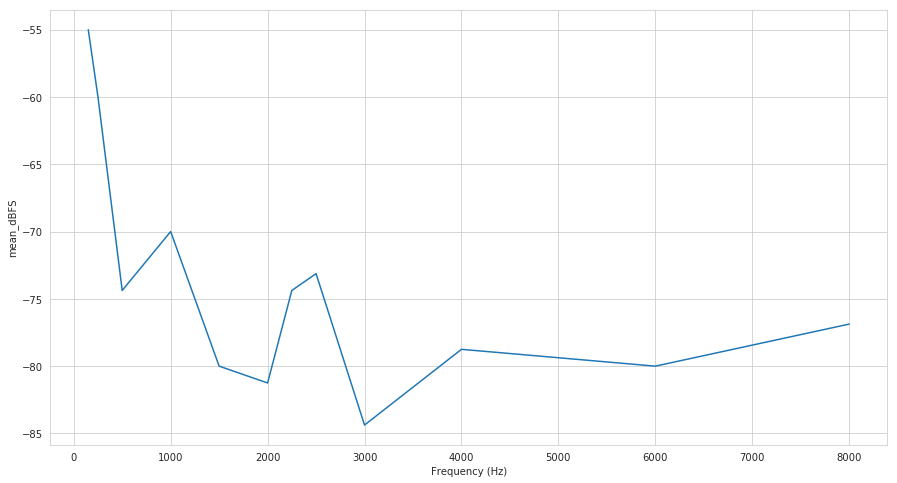

In [7]:
plt.figure(figsize=(15,8))
#sns.barplot(y = dfx['dBFS'], x = dfx['frequency'])
sns.despine()
helix = sns.dark_palette("purple")
husl1 = sns.light_palette((210, 90, 60), input="husl")
sns.lineplot(x = df_mean['Frequency (Hz)'], y = df_mean['mean_dBFS'], palette="BuGn", alpha = 1)
#sns.swarmplot(y = dfx['dBFS'], x = dfx['frequency'], palette=helix)

### ANSL data:  Plots 

#### _overall_

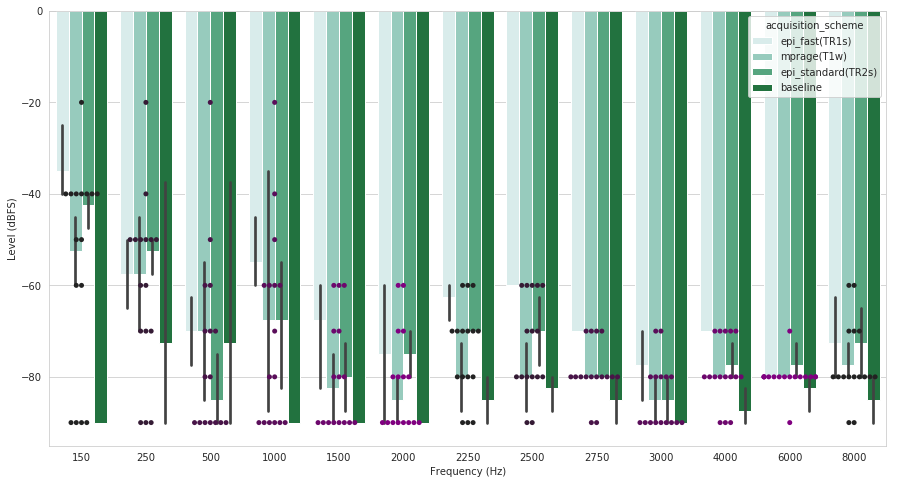

In [8]:
plt.figure(figsize=(15,8))

helix = sns.dark_palette("purple")
husl1 = sns.light_palette((210, 90, 60), input="husl")
sns.barplot(y = df['Level (dBFS)'], x = df['Frequency (Hz)'],hue = df['acquisition_scheme'], palette="BuGn")
sns.swarmplot(y = df['Level (dBFS)'], x = df['Frequency (Hz)'], palette=helix)


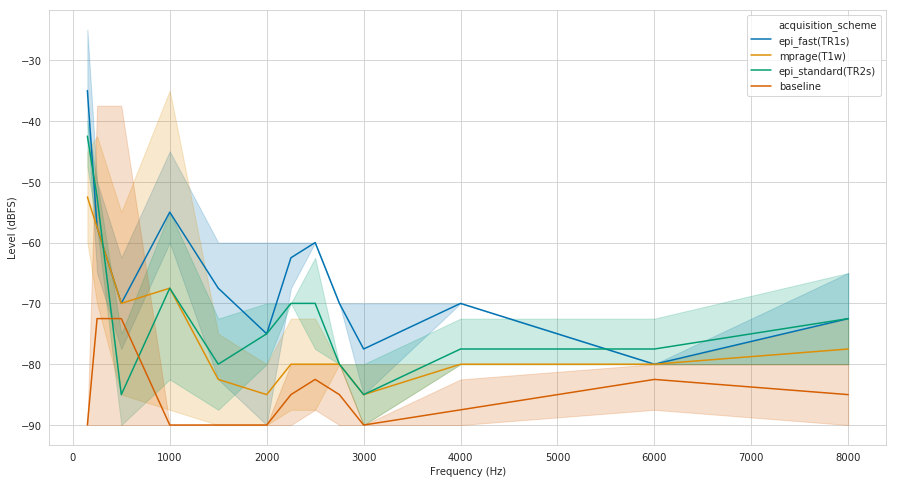

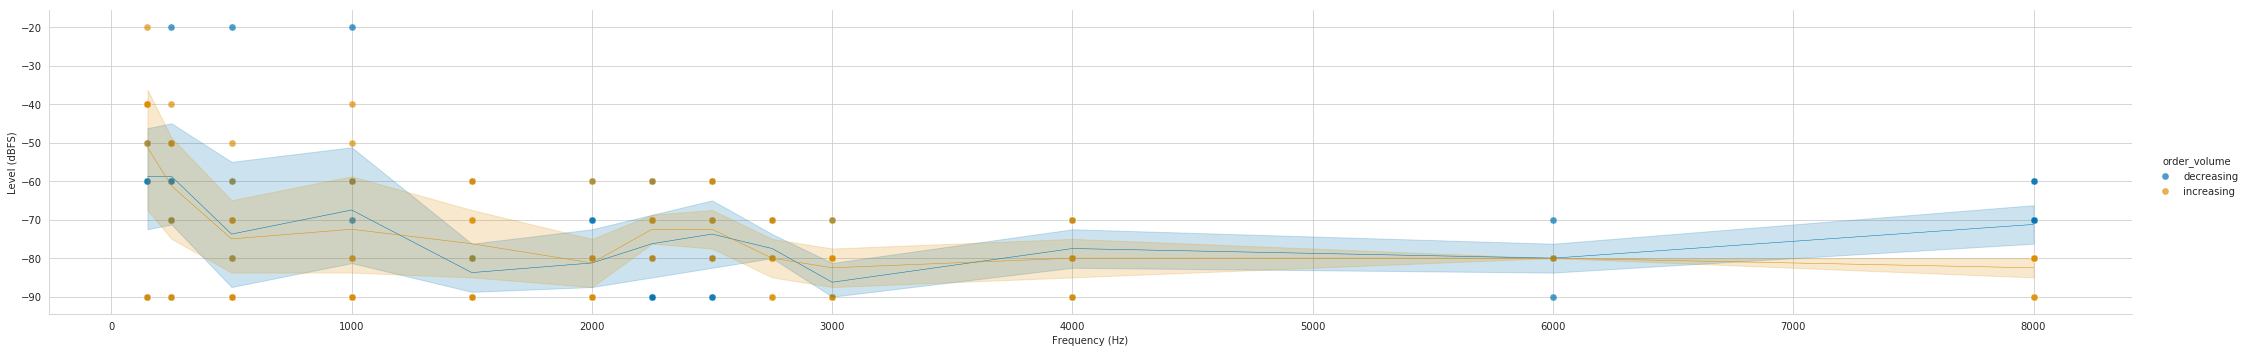

In [9]:
def plot_overview_linegraph(df):
    """ simple function to plot data
    
    show overview of data as linegraph including scatterplot
    """
    plt.figure(figsize=(15,8))
    #sns.barplot(y = dfx['dBFS'], x = dfx['frequency'])
    sns.despine()
    sns.lineplot(y = df['Level (dBFS)'], x = df['Frequency (Hz)'],
                 hue = df['acquisition_scheme'], palette='colorblind', alpha = 1)
    #sns.swarmplot(y = dfx['dBFS'], x = dfx['frequency'], palette=helix)

    pal = dict(increasing="seagreen", decreasing="gray")
    g = sns.FacetGrid(df, hue="order_volume",palette='colorblind',
                      height=5, aspect=6)
    g.map(plt.scatter, "Frequency (Hz)", "Level (dBFS)", s=50, alpha=.7,
          linewidth=.5, edgecolor="white")
    g.map(sns.lineplot, "Frequency (Hz)", "Level (dBFS)", alpha=1,
          linewidth=.5,palette='colorblind')
    g.add_legend();
plot_overview_linegraph(df)

/home/michael/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2160x720 with 0 Axes>

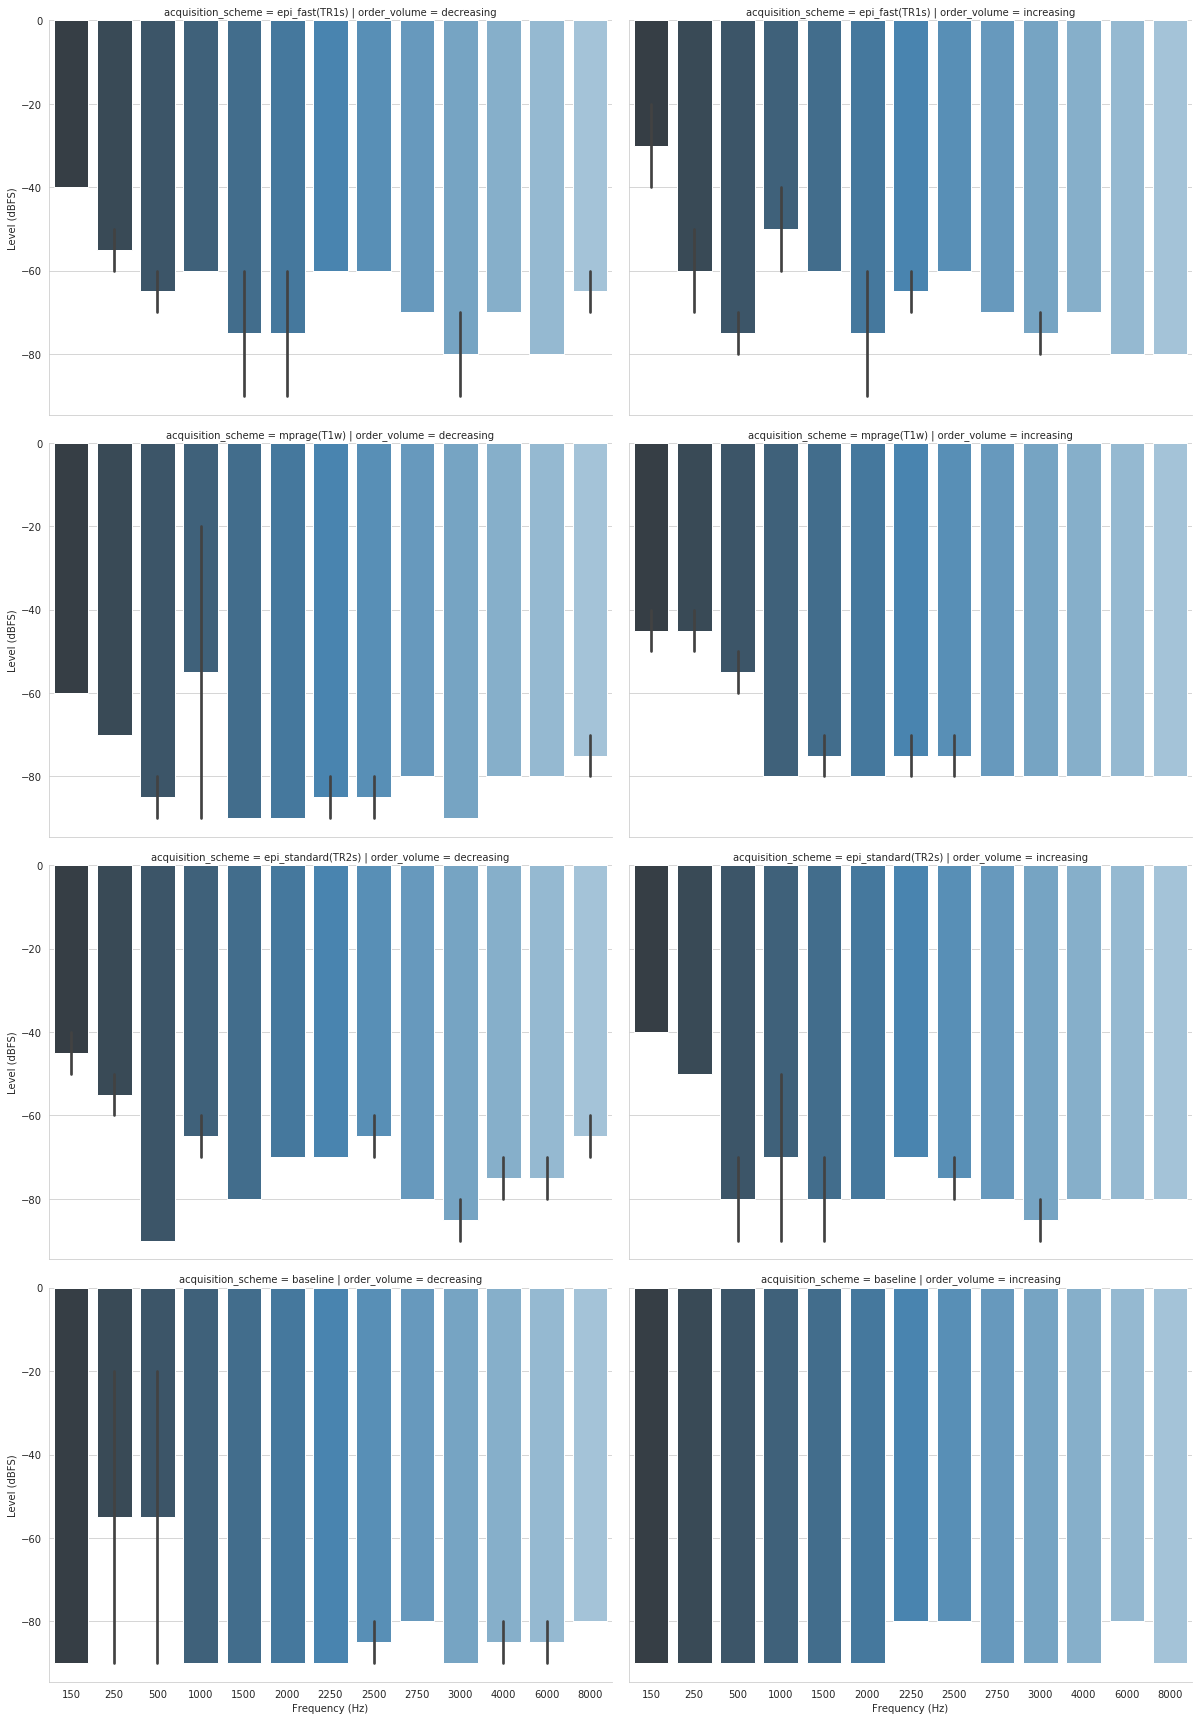

In [10]:
def plot_settings_barplot(dataframe):
    """ simple function to plot data
    
    show overview of data as barplot
    """
    plt.figure(figsize=(30,10))
    g = sns.FacetGrid(dataframe, col="order_volume",
                      row="acquisition_scheme", height=6, aspect=1.4)
    g.map(sns.barplot, "Frequency (Hz)", "Level (dBFS)",palette="Blues_d");
    
plot_settings_barplot(df)

#### _by condition: increasing/decreasing_

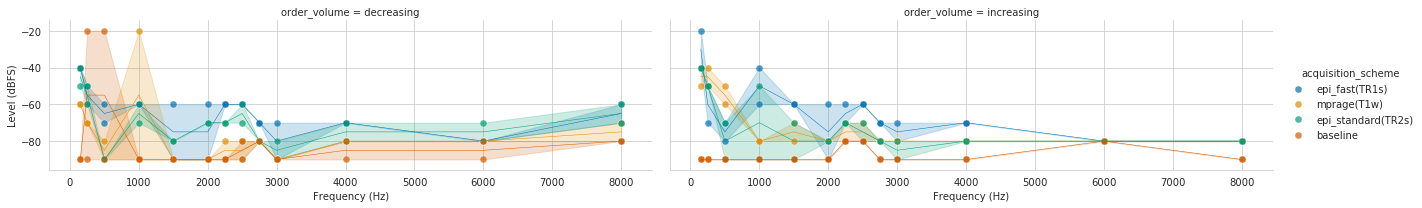

In [11]:
def plot_condition_overview(df):
    """ simple function to plot data
    
    show data separated by descending and ascendning volume
    as linegraph including scatterplot
    """
    g = sns.FacetGrid(df, col="order_volume",  hue="acquisition_scheme",
                      height=3, aspect=3,palette='colorblind')
    g.map(sns.lineplot, "Frequency (Hz)", "Level (dBFS)", alpha=1, linewidth=.5)
    g.map(plt.scatter, "Frequency (Hz)", "Level (dBFS)", s=50, alpha=.7,
          linewidth=.5, edgecolor="white")
    g.add_legend()
    
plot_condition_overview(df)

##### _by mri-settings_

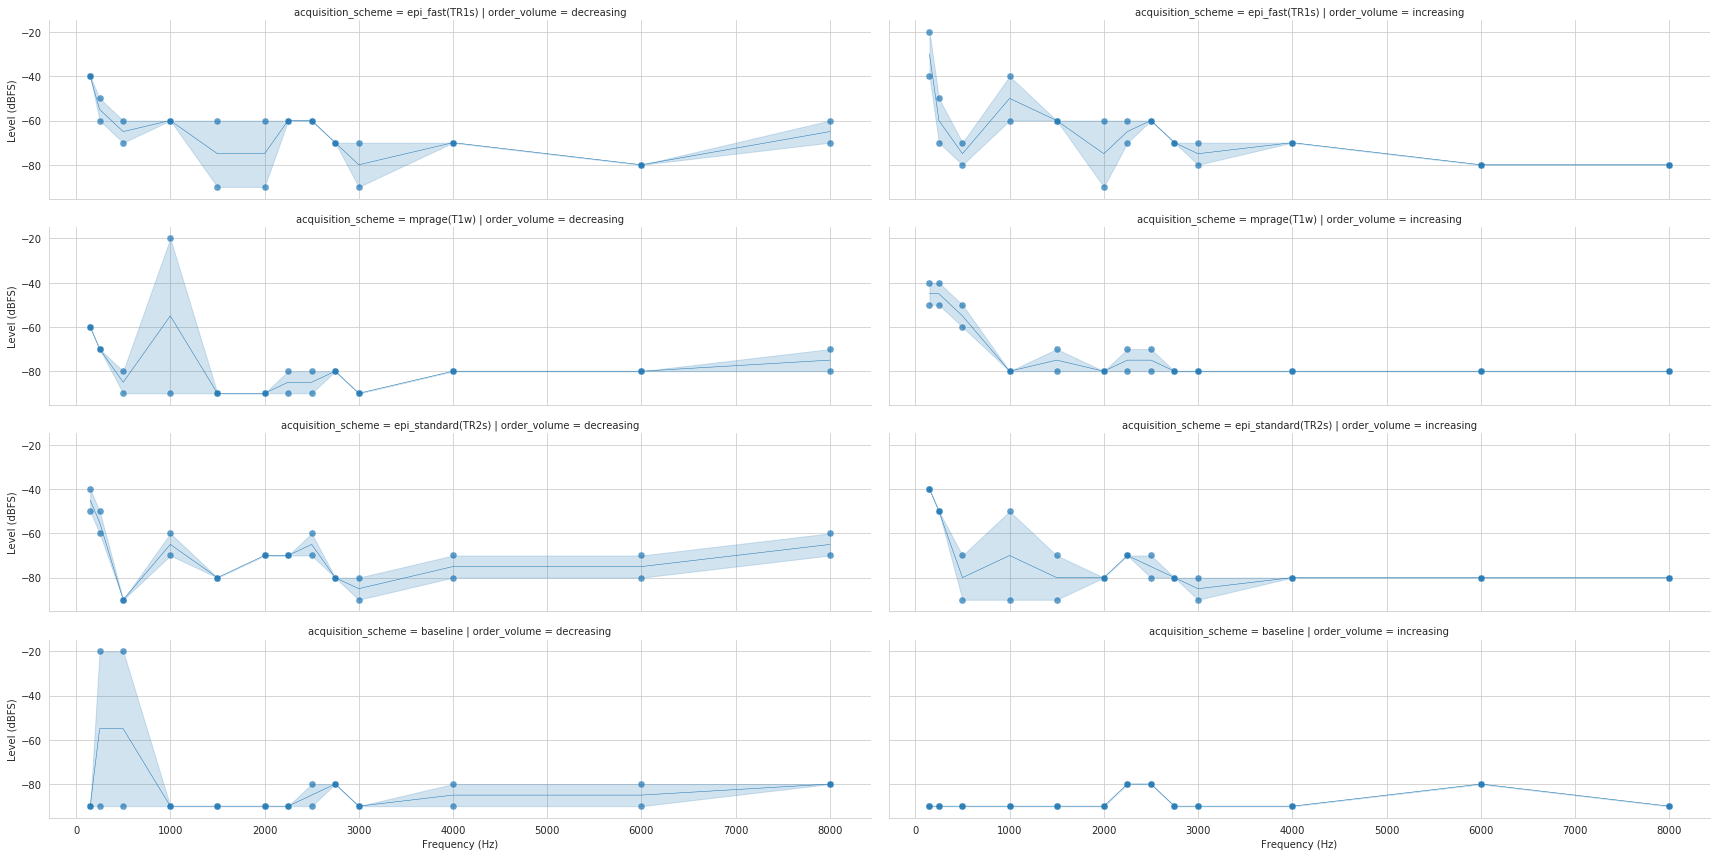

In [12]:
def plot_settings_overview(df):
    """ 
    simple function to plot data
    
    show data separated by mri-settings as linegraph including scatterplot
    """
    g = sns.FacetGrid(df, col="order_volume", row="acquisition_scheme",height=3, aspect=4)
    g.map(sns.lineplot, "Frequency (Hz)", "Level (dBFS)", alpha=1, linewidth=.5,palette="Blues_d")
    g.map(plt.scatter, "Frequency (Hz)", "Level (dBFS)", s=50, alpha=.7, linewidth=.5, edgecolor="white")

plot_settings_overview(df)

baseline
epi_fast(TR1s)
epi_standard(TR2s)
mprage(T1w)


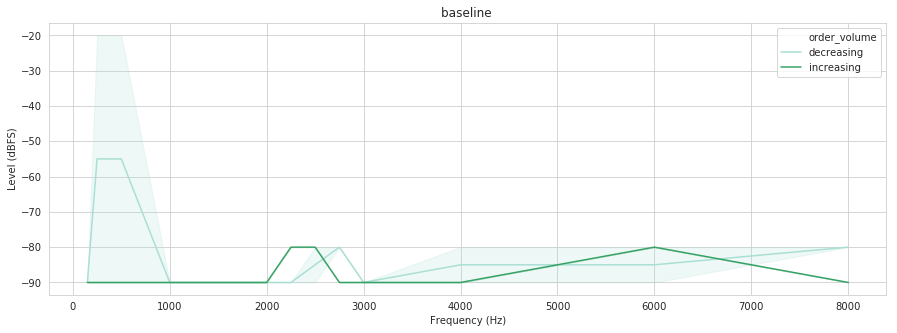

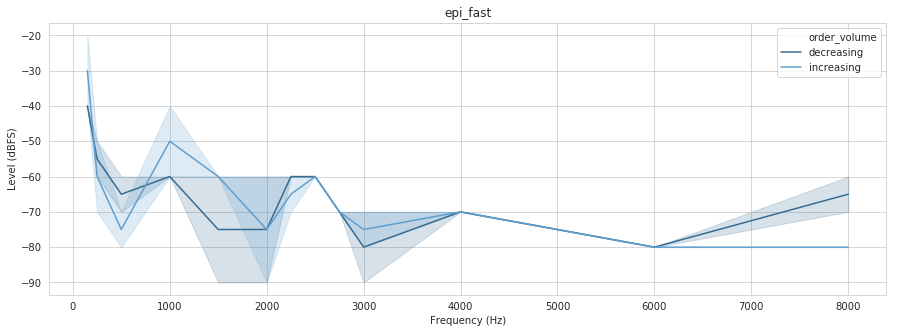

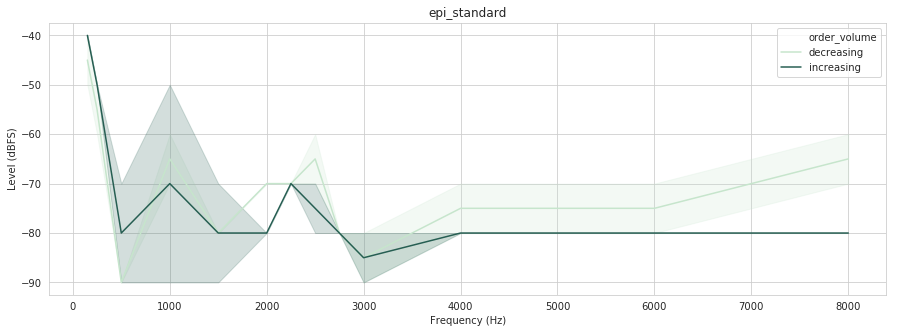

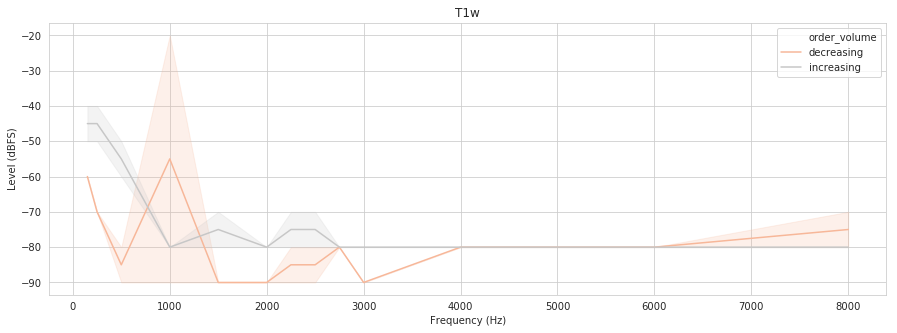

In [13]:
def plot_mri_settings(df):
    """ 
    function to group data by mri_settings and plot data
    
    returns data for each mri setting as dataframe and plot as linegraph
    """
    grouped = df.groupby('acquisition_scheme')

    for name, group in grouped:
        print(name)
        if 'baseline'in name:
            df_base = pd.DataFrame(group)
        elif 'epi_fast' in name:
            df_tr1 = pd.DataFrame(group)
        elif 'epi_standard'in name:
            df_tr2 = pd.DataFrame(group)
        elif 'T1w' in name:
            df_t1w = pd.DataFrame(group)

    # baseline
    sns.set_style('whitegrid')
    plt.figure(figsize=(15,5))
    sns.despine()
    sns.lineplot(data=df_base,y = df_base['Level (dBFS)'], x = df_base['Frequency (Hz)'],hue = df_base['order_volume']
                 , palette="BuGn", alpha = 1)
    plt.title('baseline ')

    # epi fast
    plt.figure(figsize=(15,5))
    sns.despine()
    sns.lineplot(data=df_tr1,y = df_tr1['Level (dBFS)'], x = df_tr1['Frequency (Hz)'],hue = df_tr1['order_volume'],
                 palette="Blues_d", alpha = 1)
    plt.title('epi_fast')

    # epi standard
    plt.figure(figsize=(15,5))
    sns.despine()
    sns.lineplot(data=df_tr2,y = df_tr2['Level (dBFS)'], x = df_tr2['Frequency (Hz)'],hue = df_tr2['order_volume'],
                 palette=("ch:2.5,-.2,dark=.3"), alpha = 1)
    plt.title('epi_standard')

    # T1
    plt.figure(figsize=(15,5))
    sns.despine()
    sns.lineplot(data=df_t1w,y = df_t1w['Level (dBFS)'], x = df_t1w['Frequency (Hz)'],hue = df_t1w['order_volume'],
                 palette=("RdGy"), alpha = 1)
    plt.title('T1w')

    return df_base,df_tr1, df_tr2, df_t1w

df_base,df_tr1, df_tr2, df_t1w = plot_mri_settings(df)

##### _including scatterplot_

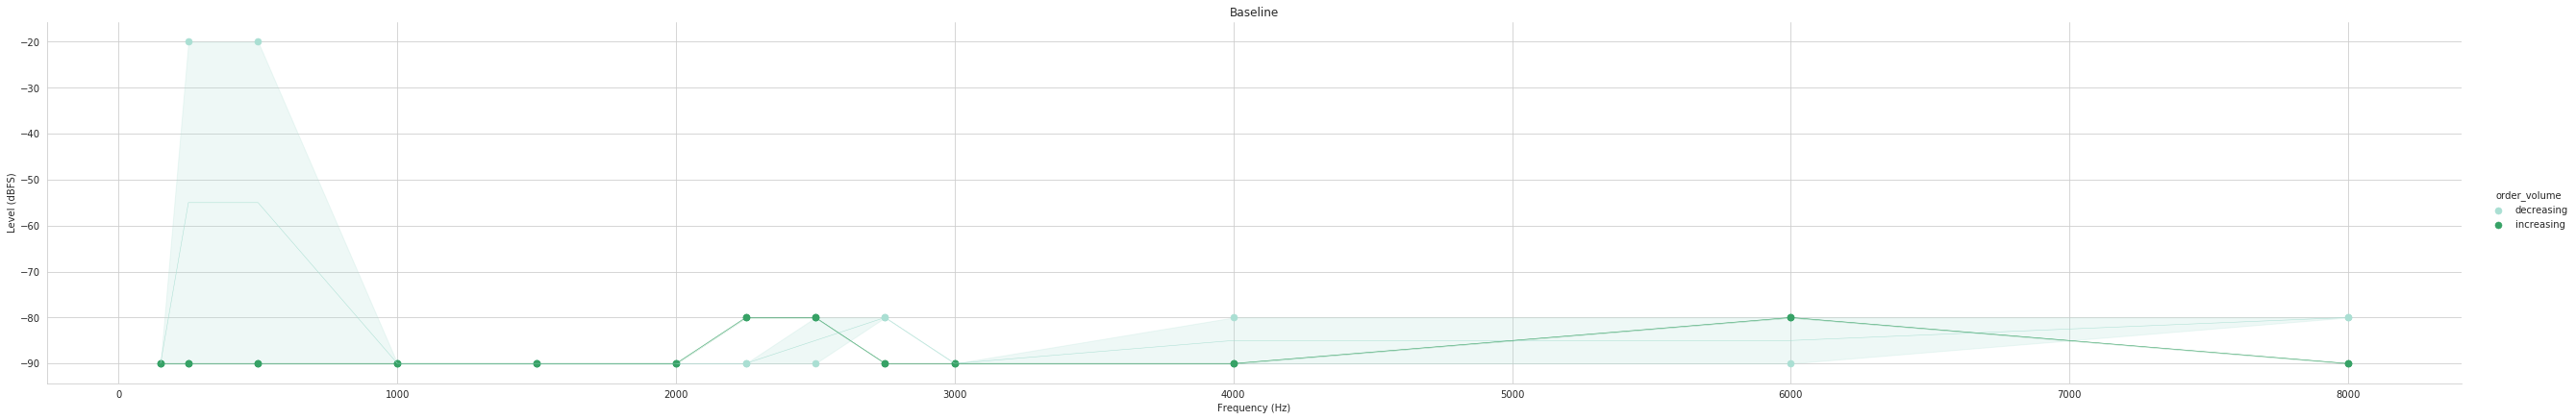

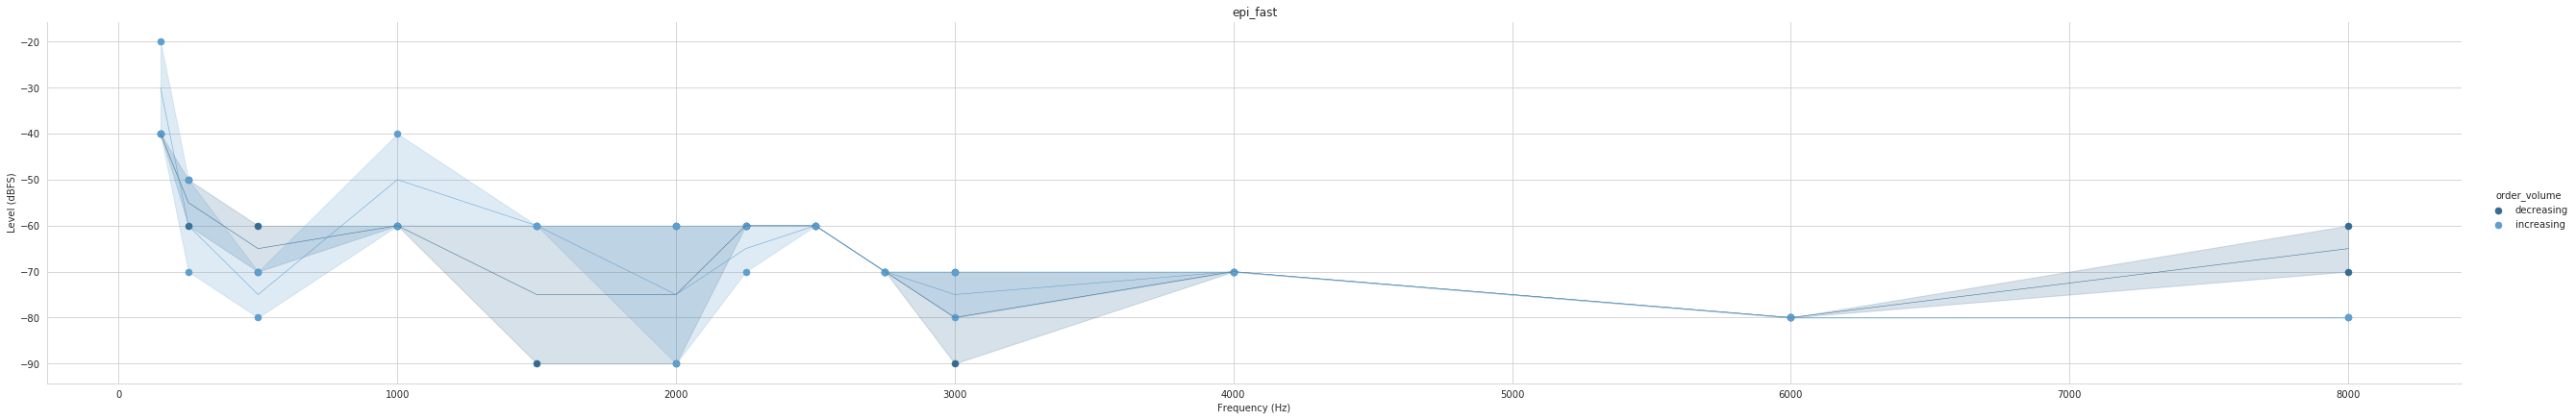

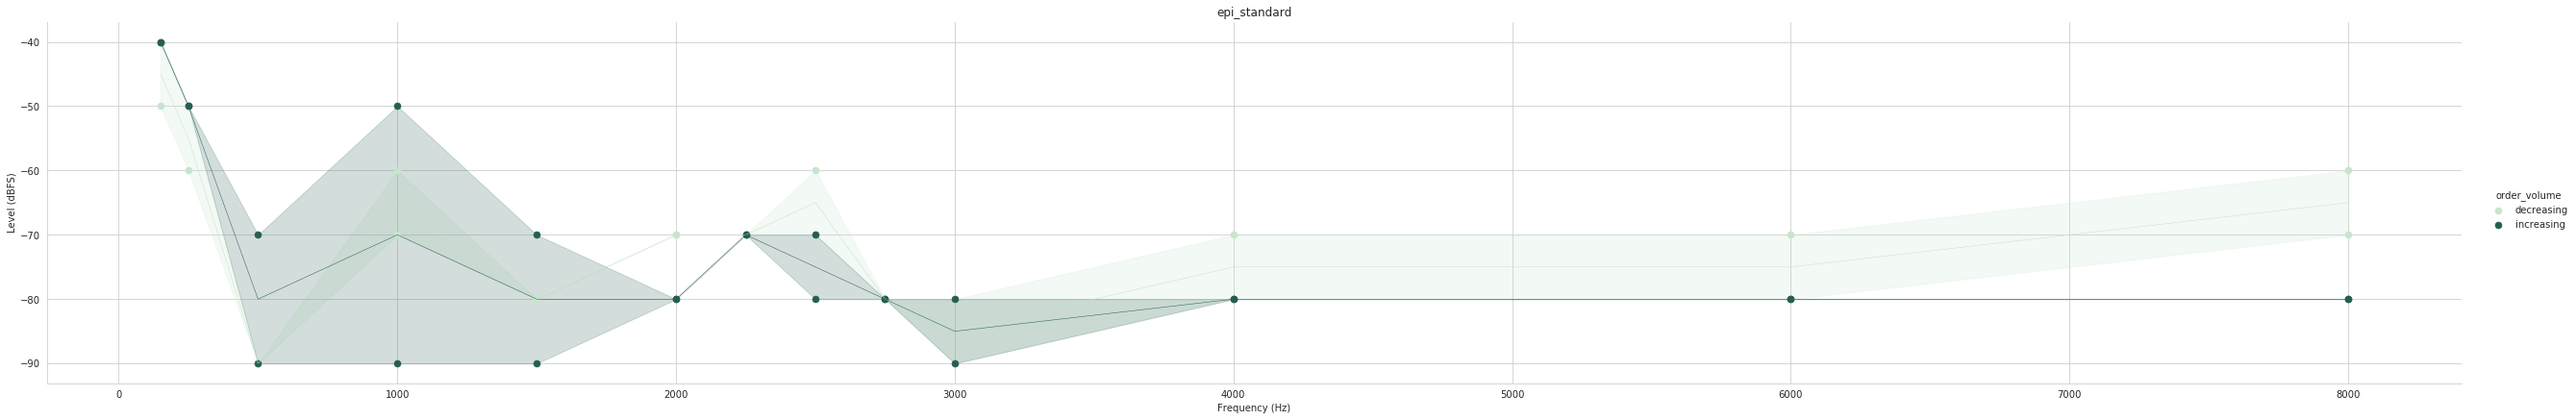

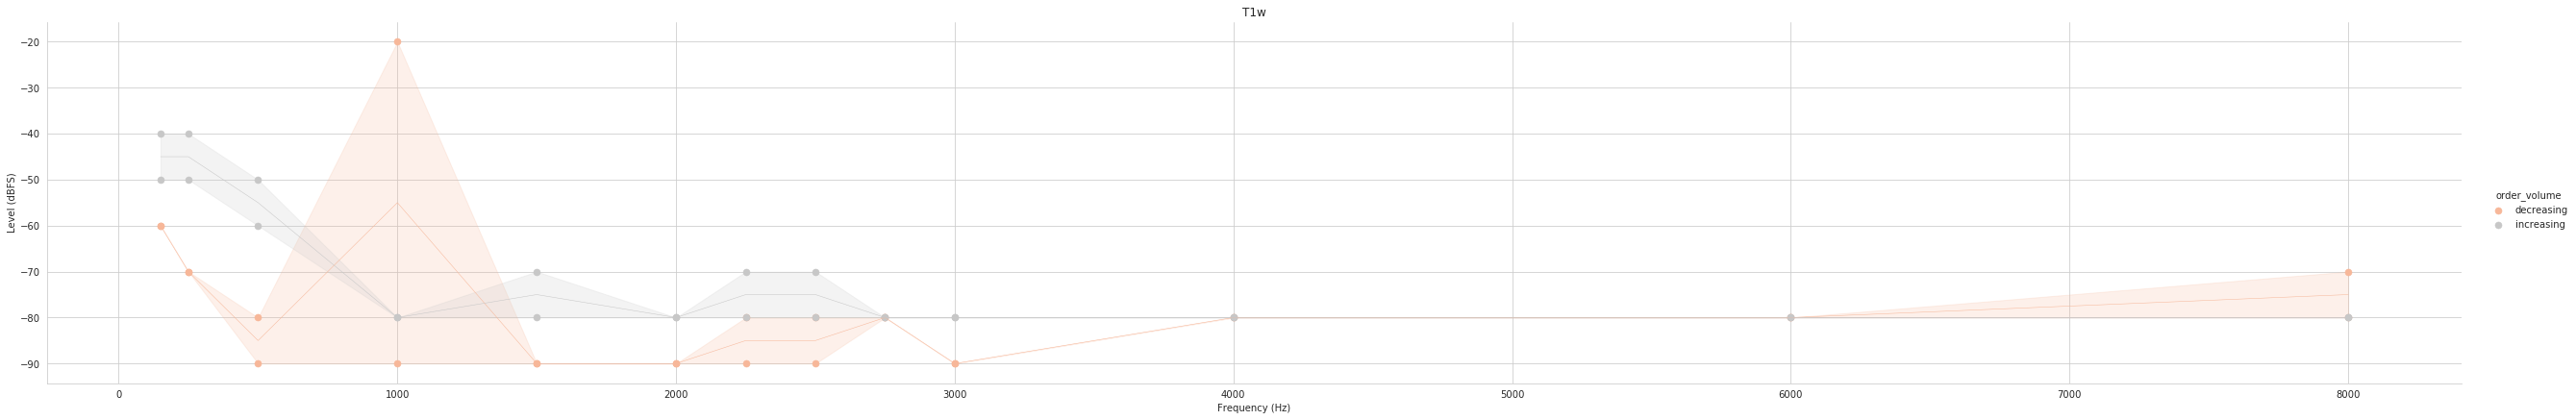

In [14]:
def plot_mri_settings_scatter(df):
    """ 
    function to group data by mri_settings and plot data
    
    returns data for each mri setting as dataframe and plot as linegraph
    inclding scatterplot
    """    
    grouped = df.groupby('acquisition_scheme')

    for name, group in grouped:
        
        if 'baseline'in name:
            df_base = pd.DataFrame(group)
        elif 'epi_fast' in name:
            df_tr1 = pd.DataFrame(group)
        elif 'epi_standard'in name:
            df_tr2 = pd.DataFrame(group)
        elif 'T1w' in name:
            df_t1w = pd.DataFrame(group)
    
    g = sns.FacetGrid(df_base,hue='order_volume', height=6, aspect=6,palette='BuGn')
    g.map(sns.lineplot, "Frequency (Hz)", "Level (dBFS)", alpha=1, linewidth=.5)
    g.map(plt.scatter, "Frequency (Hz)", "Level (dBFS)", s=50, alpha=1, linewidth=.5)
    plt.title('Baseline')
    g.add_legend()
    sns.despine()


    g = sns.FacetGrid(df_tr1,hue='order_volume', height=6, aspect=6,palette='Blues_d')
    g.map(sns.lineplot, "Frequency (Hz)", "Level (dBFS)", alpha=1, linewidth=.5)
    g.map(plt.scatter, "Frequency (Hz)", "Level (dBFS)", s=50, alpha=1, linewidth=.5)
    plt.title('epi_fast')
    g.add_legend()
    sns.despine()

    g = sns.FacetGrid(df_tr2,hue='order_volume', height=6, aspect=6,palette=("ch:2.5,-.2,dark=.3"))
    g.map(sns.lineplot, "Frequency (Hz)", "Level (dBFS)", alpha=1, linewidth=.5)
    g.map(plt.scatter, "Frequency (Hz)", "Level (dBFS)", s=50, alpha=1, linewidth=.5)
    plt.title('epi_standard')
    g.add_legend()
    sns.despine()



    g = sns.FacetGrid(df_t1w,hue='order_volume', height=6, aspect=6,palette='RdGy')
    g.map(sns.lineplot, "Frequency (Hz)", "Level (dBFS)", alpha=1, linewidth=.5)
    g.map(plt.scatter, "Frequency (Hz)", "Level (dBFS)", s=50, alpha=1, linewidth=.5)
    plt.title('T1w')
    g.add_legend()
    sns.despine()
    return df_base,df_tr1, df_tr2, df_t1w 

df_base,df_tr1, df_tr2, df_t1w = plot_mri_settings_scatter(df)

### Plotting: displaying results of ansl overlayed with common mri-frequencies
* **_(highly recommended that you aquire data for your specific mri)_**
* extracting frequencies uesd in different settings (aquired via mri-compatible microphone) 

* here we will be using audacity again, as our main ressource to extract the volume of each frewuency in our recording of mri sounds. Audacity can be downloaded _[here](https://www.audacityteam.org)_

  * to do this:
          -> click file > open > select your audio recording
          -> mark an intervall that you want to analyse
          -> click analyze > plot spectrum
          -> which will open a popup window where you will be able to specify certain parameters
              - set: axis = linear frequency
                     size = 4096

           -> click export -> export as wav
           -> repeat this step for every recording you want to include
          
   -> the output of this will be used here to plot volume per frequency for stimuli or mri audio recordings

#### _Let's first take a look at our audio file_

In [15]:
#source: https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html
from scipy.io import wavfile

rate, audio = wavfile.read('/home/michael/ANSL/t1_5tr.wav') # exchange string for your file
audio = np.mean(audio, axis=1)


#### _as a spectogram_ using [librosa](https://librosa.github.io/librosa/generated/librosa.feature.melspectrogram.html)

In [16]:
y, sr = librosa.load('/home/michael/ANSL/t1_5tr.wav')
librosa.feature.melspectrogram(y=y, sr=sr)

array([[7.53980739e-01, 1.10364087e+00, 2.42058355e+00, ...,
        5.48429637e+00, 9.32906870e-01, 3.91300491e-01],
       [5.43385348e-01, 3.22812335e-01, 2.37279932e-01, ...,
        8.42717780e-01, 1.03714986e+00, 2.29353435e+00],
       [2.07008093e-01, 1.65957287e-01, 4.51420219e-01, ...,
        4.89581064e-01, 6.18854774e-01, 4.58194849e+00],
       ...,
       [2.14549347e-03, 1.61028400e-03, 1.47391463e-03, ...,
        1.80830181e-03, 2.07101276e-03, 1.38556079e-03],
       [9.10719166e-04, 5.36894685e-04, 3.07911876e-04, ...,
        5.76240412e-04, 4.89022182e-04, 5.22329056e-04],
       [1.64069841e-04, 6.30849744e-05, 3.17793485e-05, ...,
        4.83463509e-05, 4.24640542e-05, 4.16624760e-05]])

In [17]:
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

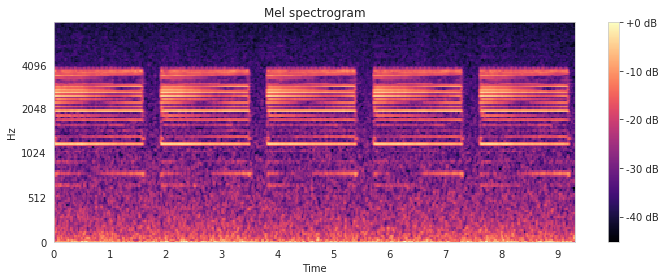

In [18]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),
                         y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [19]:
def get_audio_data(file):
    """ 
    function to extract and clean audio file
    
    returns dataframe including volume for each frequency 
    in data
    """
    audio = pd.read_table(file)
    audio = audio[audio["Frequency (Hz)"] < 8000]
    audio.rename(columns={'Level (dB)':'Level (dBFS)'}, inplace=True)
    
    return audio
t1 = get_audio_data('/home/michael/atom/plotting/t1w_spectrum.txt')
t2_tr1 = get_audio_data('/home/michael/atom/plotting/t2_tr1_spectrum.txt')
t2_tr2 = get_audio_data('/home/michael/atom/plotting/t2_tr2_spectrum.txt')


/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [20]:
def rename_columns(df):
    """ 
    function to rename columns to allow for easier plotting
    of mri  audio recordings compared to ansl output
    """
    df.rename(columns={'dBFS':'Level (dBFS)'}, inplace=True)
    df['Frequency (Hz)'].astype(float)
    return df

df_t1w = rename_columns(df_t1w)
df_mean = rename_columns(df_mean)              

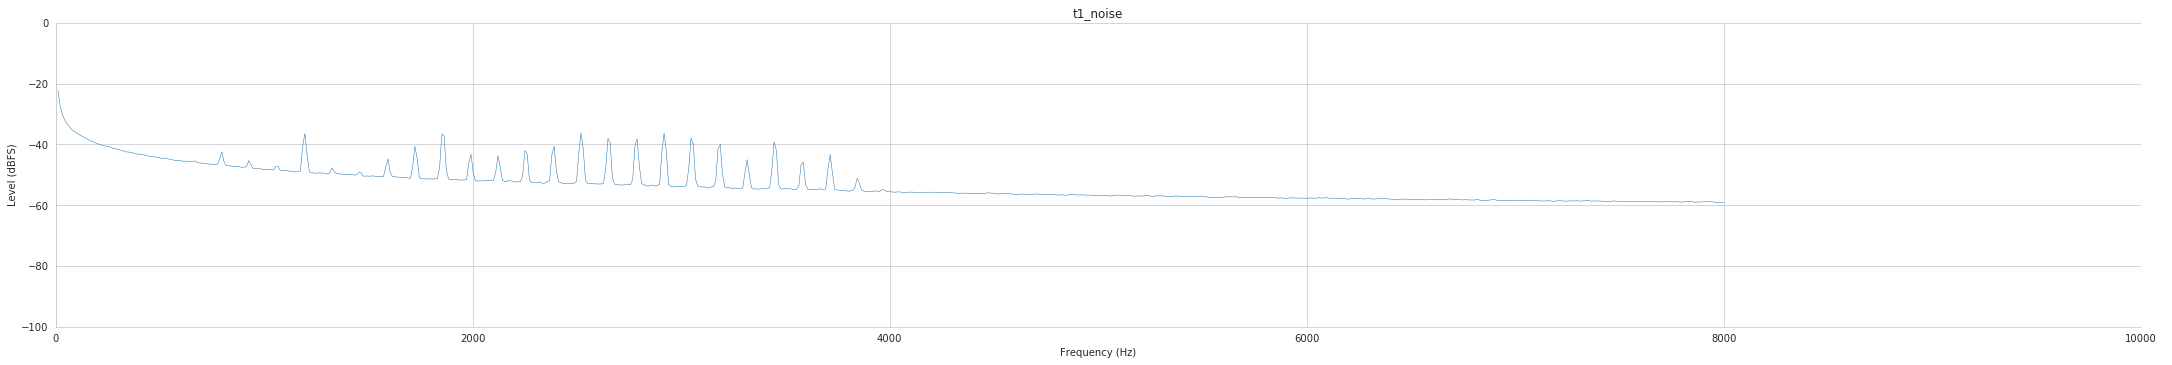

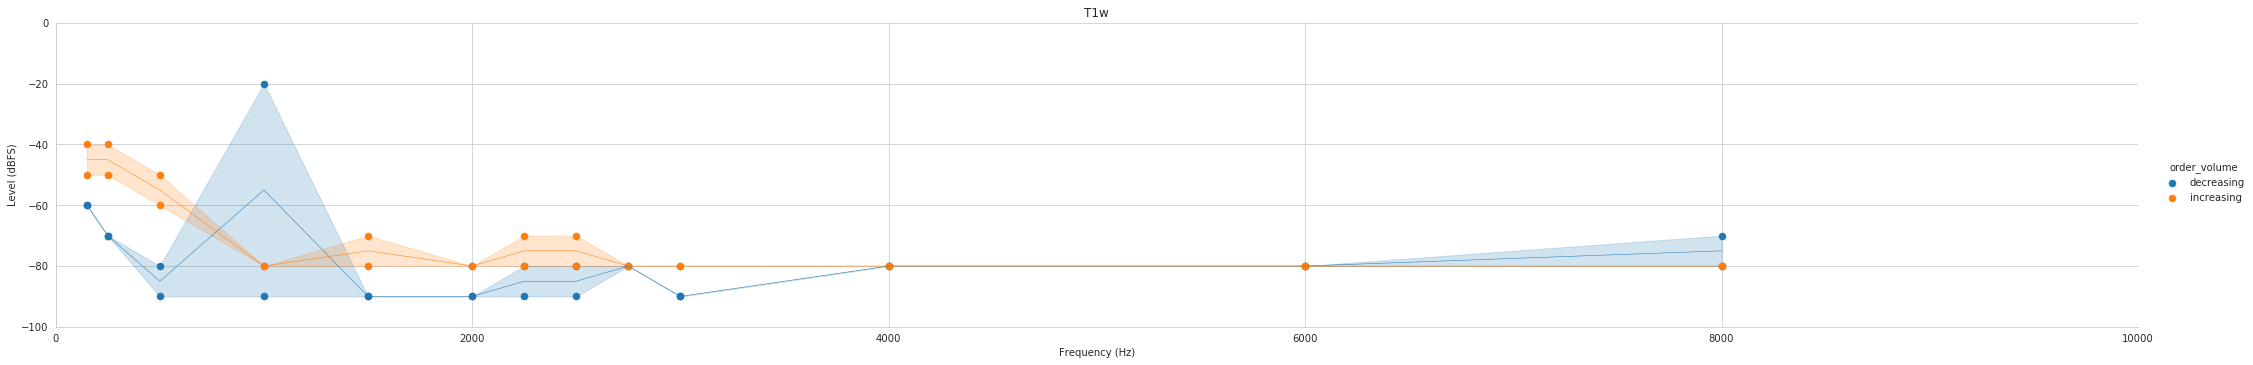

In [21]:
def plot_comparision(df1,df2):
    """ 
    function to plot volume per frequency for mri audio data
    and mean volume of frequency by ansl
    """
    g = sns.FacetGrid(df1, height=5, aspect=6,palette=("ch:2.5,-.2,dark=.3"),sharex=True,sharey=True)
    plt.xlim(0,-100)
    plt.xlim(0,8000)
    g.map(sns.lineplot, "Frequency (Hz)", "Level (dBFS)", alpha=1, linewidth=.5)
    #g.map(plt.scatter, "Frequency (Hz)", "Level (dBFS)", s=50, alpha=1, linewidth=.5)
    plt.title('t1_noise')
    plt.ylim(-100, 0)

    plt.xlim(0,10000)
    g.add_legend()
    sns.despine()



    g = sns.FacetGrid(df2,hue='order_volume', height=5, aspect=6)
    g.map(sns.lineplot, "Frequency (Hz)", "Level (dBFS)", alpha=1, linewidth=.5)
    g.map(plt.scatter, "Frequency (Hz)", "Level (dBFS)", s=50, alpha=1, linewidth=.5)
    plt.title('T1w')
    g.add_legend()
    plt.ylim(-100, 0)

    plt.xlim(0,10000)
    sns.despine()
    
plot_comparision(t1,df_t1w)

### we'll further display the frequencies of our mri noise as straight lines, whoose transparency will represent the volume of the given frequency

In [22]:

def alpha_scaling(df):
    """ 
    function to scale extracted volume in a range from 0 (lowest volume in data)
    and 1 (highest volume in data)
    
    returns scaled (scaled volume per frequency as df) and 
    xyz_shape (dimensions of df)
    """
    xyz = (df['Level (dBFS)'])
    xyz = pd.DataFrame(xyz)
    xyz_shape = xyz.shape
    scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)
    scaled = scaler.fit(xyz)
    scaled = scaler.transform(xyz)
    scaled = scaled.reshape(xyz_shape[0])
    scaled.shape
    scaled = pd.DataFrame({'db_transformed':scaled})
    return scaled, xyz, xyz_shape

def draw_lines(dataframe, xyz_shape, position_lines, half_height):
    """ 
    function to draw lines to overlay over plot for each frequency in input data
    
    takes df, xyz_shape (dimensions of df), the position(from where to where the lines 
    should be drawn, and half_height (if lines should be drawn over the complete plot
    or just half of it)) 
    
    returns coordinates for plotting
    """
    counter = 0
    coordinates = []
    lines = []
    
    for item in t1['Frequency (Hz)']:
        frequency_coordinates = tuple([t1['Frequency (Hz)'].iloc[counter],t1['Frequency (Hz)'].iloc[counter]])

        if half_height is True:
            line_coordinates = position_lines

        if half_height is False:
            line_coordinates = tuple([-100,0])
        
        coordinates.append(frequency_coordinates)
        lines.append(line_coordinates)
        counter +=1
    coordinates_array = np.array(coordinates)
    coordinates= pd.DataFrame({'x_coordinates': coordinates, 'y_coordinates': lines})
    
    x_coordinates = np.array(coordinates['x_coordinates'])
    x = x_coordinates.shape
    x[0]
    x_coordinates = x_coordinates.reshape(xyz_shape[0])

    y_coordinates = np.array(coordinates['y_coordinates'])
    y = y_coordinates.shape
    y[0]
    y_coordinates= y_coordinates.reshape(xyz_shape[0])
    return x_coordinates, y_coordinates, coordinates



In [23]:
def analyze_mri_noise(item, half_height):
    """ 
    function to analyze mri audio recording
    
    takes path to audio data as input and half_height(if lines should be
    drawn over the complete plot or just half of it))  
    
    returns coordinates for plotting"""
    df = get_audio_data(item)
    scaled, xyz, xyz_shape = alpha_scaling(df)
    position_lines = tuple([-50,0])
    x_coordinates, y_coordinates, coordinates = draw_lines(df,xyz_shape, position_lines, half_height)
    
    return x_coordinates, y_coordinates, coordinates, scaled
x_coordinates, y_coordinates, coordinates, scaled = analyze_mri_noise('/home/michael/atom/plotting/t1w_spectrum.txt',
                                                                     half_height =False)

/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [24]:

def analyze_stimuli(item):
    """ 
    function to analyze data of stimuli recording
    
    takes path to audio data as input and half_height(if lines should be
    drawn over the complete plot or just half of it))  
    
    returns coordinates for plotting"""
    stimuli = get_audio_data(item)
    scaled, xyz, xyz_shape = alpha_scaling(stimuli)
    position_lines = tuple([-100,-50])
    x_coordinates_stimuli, y_coordinates_stimuli, coordinates_stimuli = draw_lines(stimuli, xyz_shape,
                                                                                   position_lines,
                                                                                   half_height = True)
    return x_coordinates_stimuli, y_coordinates_stimuli, coordinates_stimuli, scaled
x_coordinates_stimuli, y_coordinates_stimuli, coordinates_stimuli, scaled_stimuli = analyze_stimuli('/home/michael/Documents/metal_spectrum_4000.txt')

/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


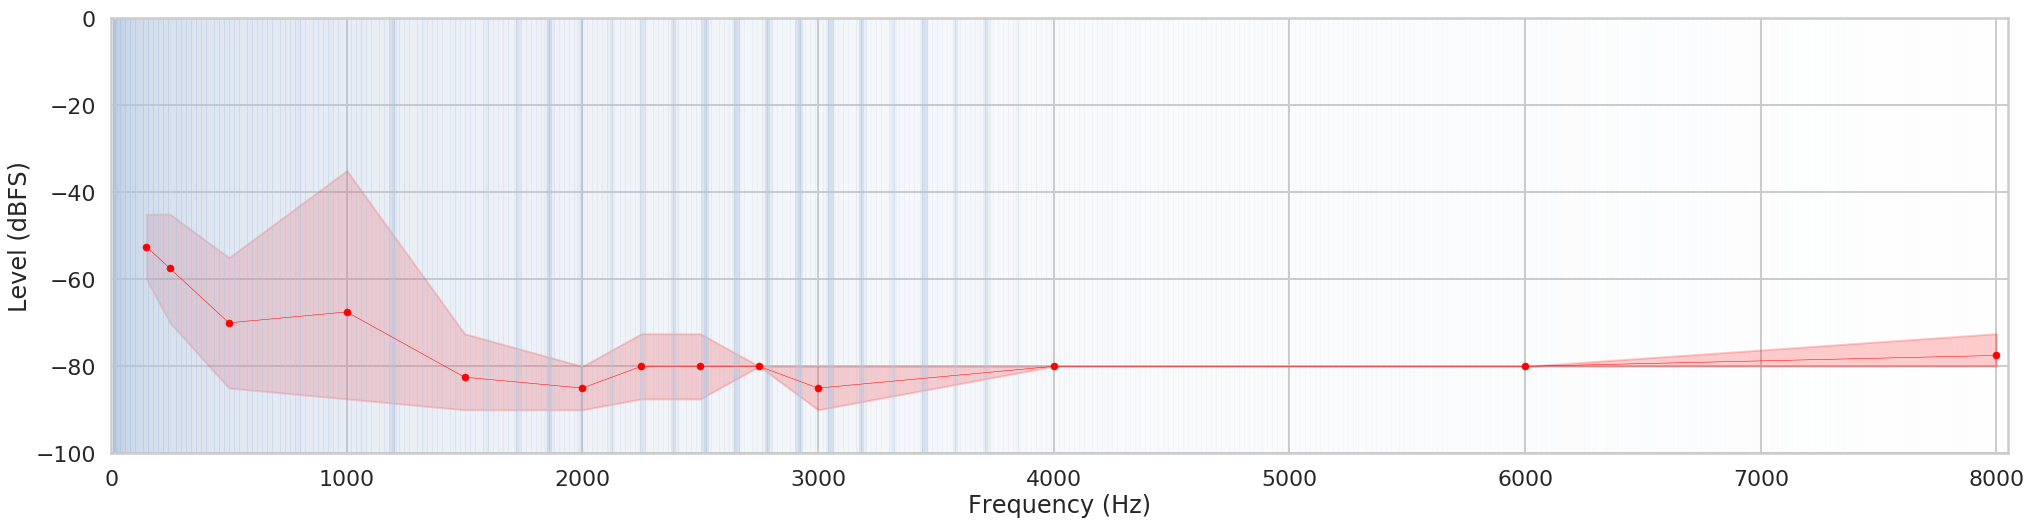

In [25]:

def plot_mri_overlay(x_coordinates, y_coordinates, coordinates, df):
    """
    function to plot results of ansl (mean volume per frequency) 
    overlayed with mri frequencies with their respective volumes
    represented by the transparency of the overlayed lines
    
    takes coorinates of 'analyze_mri_noise' as input
    """
    sns.set_style('whitegrid')
    sns.set_context("poster")
    plt.figure(figsize=(34,8))
    plt.xlim(0,8050)
    plt.ylim(-100, 0)

    counter = 0
    for i in x_coordinates:
        plt.plot(x_coordinates[counter],y_coordinates[counter], 'k-', color="lightsteelblue",
                 alpha=scaled['db_transformed'].iloc[counter])
        counter +=1
    mean = get_stats(df)
    sns.lineplot((df["Frequency (Hz)"]), (df["Level (dBFS)"]), alpha=1, linewidth=.5, color='r')
    plt.scatter(mean["Frequency (Hz)"], mean["mean_dBFS"], s=50, alpha=1, linewidth=.5,color='r',zorder=5)

x_coordinates, y_coordinates, coordinates, scaled = analyze_mri_noise('/home/michael/atom/plotting/t1w_spectrum.txt',
                                                                     half_height =False)
plot_mri_overlay(x_coordinates, y_coordinates, coordinates, df_t1w)

### Plotting: displaying results of ansl overlayed with common frequencies in stimuli material  

		- example: frequency spectrum of a typical 'metal'-snippet in green and frequency spectrum of a t1 mrisequence in blue
        

/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


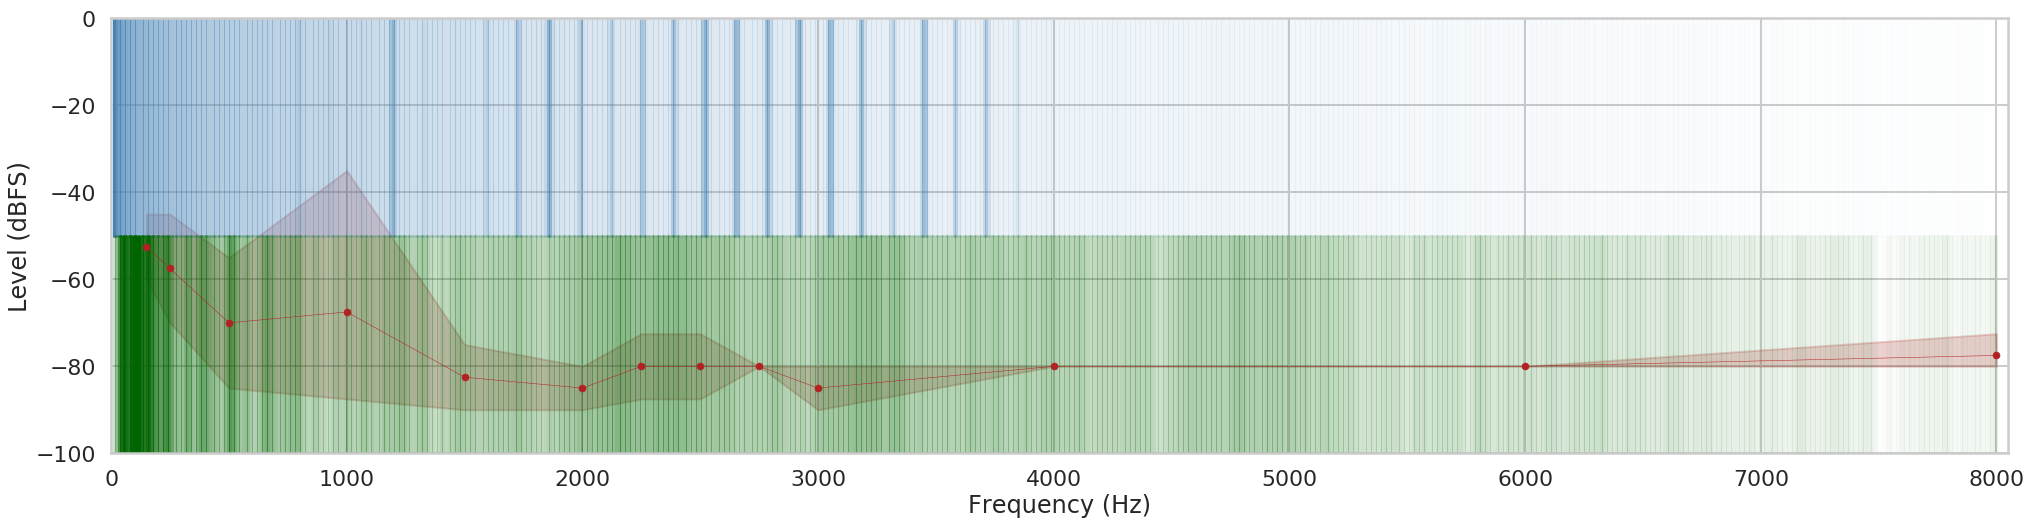

In [26]:

#x_coordinates_stimuli, y_coordinates_stimuli, coordinates_stimuli, scaled_stimuli = analyse_stimuli('/home/michael/Documents/metal_spectrum_4000.txt')

def plot_mri_stimuli_comparision(x_coordinates, y_coordinates, coordinates, scaled,
                                 x_coordinates_stimuli, y_coordinates_stimuli,
                                 coordinates_stimuli, scaled_stimuli, df):
    """
    function to plot results of ansl (mean volume per frequency) 
    overlayed with mri frequencies and stimuli frequencies with their respective volumes
    represented by the transparency of the overlayed lines
    
    takes coorinates of 'analyze_mri_noise' as input
    """
    sns.set_style('whitegrid')
    sns.set_context("poster")
    plt.figure(figsize=(34,8))
    plt.xlim(0,8050)
    plt.ylim(-100, 0)

    counter = 0
    for i in x_coordinates:
        plt.plot(x_coordinates[counter],y_coordinates[counter], 'k-', color="steelblue",
                 alpha=scaled['db_transformed'].iloc[counter])
        counter +=1

    counter = 0

    for i in x_coordinates_stimuli:
        plt.plot(x_coordinates_stimuli[counter],y_coordinates_stimuli[counter], 'k-', color="darkgreen",
                 alpha=scaled_stimuli['db_transformed'].iloc[counter])
        counter +=1
    
    mean = get_stats(df)
    sns.lineplot((df["Frequency (Hz)"]), (df["Level (dBFS)"]),
                 alpha=1, linewidth=.5, color='firebrick')
    plt.scatter(mean["Frequency (Hz)"], mean["mean_dBFS"],
                s=50, alpha=1, linewidth=.5,color='firebrick',zorder=5)

x_coordinates, y_coordinates, coordinates, scaled = analyze_mri_noise('/home/michael/atom/plotting/t1w_spectrum.txt',
                                                                     half_height =True)
plot_mri_stimuli_comparision(x_coordinates, y_coordinates, coordinates, scaled,
                             x_coordinates_stimuli, y_coordinates_stimuli, coordinates_stimuli,
                             scaled_stimuli, df_t1w )
